<a href="https://colab.research.google.com/github/lasseufpa/C_MIMO/blob/1-implement-command-line-parsing-for-antenna-or-similar-configuration-in-mimo-system-simulation/analyzer.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 10px;"/>
    </a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [74]:

data = pd.read_csv('output.csv', header=None)
data.columns = ['Test', 'Nr', 'Nt', 'NoiseLevel', 'ErrorPercentage', 'BER','SNR','EVM', 'cap']
print(data.describe())

            Test          Nr          Nt  NoiseLevel  ErrorPercentage  \
count   7.000000    7.000000    7.000000         7.0         7.000000   
mean   16.000000   38.571429   70.285714         3.0        18.428571   
std     8.640988   45.088273   93.119483         0.0        20.123429   
min     4.000000    2.000000    4.000000         3.0         0.000000   
25%    10.000000    6.000000   12.000000         3.0         1.500000   
50%    16.000000   32.000000   16.000000         3.0        11.000000   
75%    22.000000   48.000000   96.000000         3.0        34.500000   
max    28.000000  128.000000  256.000000         3.0        46.000000   

            BER        SNR        EVM       cap  
count  7.000000   7.000000   7.000000  7.000000  
mean   0.187883  12.287959 -12.287959  4.235816  
std    0.203459   6.046508   6.046508  1.857200  
min    0.000858   4.184517 -20.805103  1.856351  
25%    0.018010   8.094282 -16.560524  2.907991  
50%    0.111921  11.716483 -11.716483  3.9

# BER against SNR

The plot generated by the script below represents the relationship between Signal-to-Noise Ratio (SNR) and Bit Error Rate (BER) under different noise levels in a communication system. 

SNR is a measure that compares the level of a desired signal to the level of background noise. It is an important factor in the analysis of wireless communication systems as it impacts the performance of the system. 

$$
SNR (dB) = 10 \cdot \log_{10}\left(\frac{P_{\text{signal}}}{P_{\text{noise}}}\right)
$$

BER is the number of bit errors divided by the total number of transferred bits during a studied time interval. It is a key parameter that quantifies the quality of the transmitted signal in digital communication systems.

$$
BER = \frac{N_{\text{error}}}{N_{\text{total}}}
$$

The plot is semilogarithmic, meaning that the y-axis (BER) is on a logarithmic scale and the x-axis (SNR) is on a linear scale. This type of plot is useful when the data covers a large range of values, as is often the case with BER and SNR.

This plot provides a visual representation of how signal quality (as measured by BER) varies with SNR under different noise conditions, which is a crucial aspect of understanding and optimizing the performance of communication systems.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


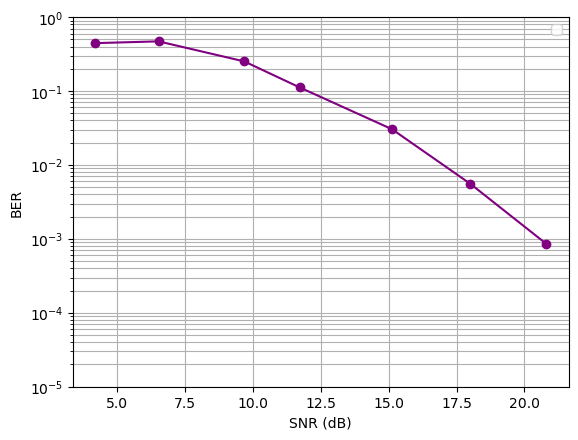

In [75]:
# Select every fourth row starting from 0
#data = data.iloc[::4, :]

data.columns = ['Test', 'Nr', 'Nt', 'NoiseLevel', 'ErrorPercentage', 'BER','SNR','EVM', 'cap']

noise_intervals = {
    3: '',
    }

data['NoiseLevel'] = data['NoiseLevel'].map(noise_intervals)

# Group the data by SNR and NoiseLevel and calculate the mean of BER
grouped_ber = data.groupby(['SNR', 'NoiseLevel'])['BER'].mean().reset_index()

# Create a semilogy plot for each noise level
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    plt.semilogy(subset['SNR'], subset['BER'], label=noise_level, color='purple', marker='o') 
                 #marker='s')

plt.ylabel('BER')
plt.xlabel('SNR (dB)')
plt.ylim([10**(-5), 1])
plt.grid(True, which ="both")
plt.legend()
plt.show()

# Capacity against SNR

The code snippet below create a plot to visualize the relationship between Signal-to-Noise Ratio (SNR) and channel capacity under different noise levels in a communication system.

Channel capacity, often simply referred to as 'capacity', is a key concept in information theory. It represents the maximum rate at which information can be transmitted over a communication channel without error, given certain constraints such as a fixed bandwidth and noise level.

The capacity of a channel is typically calculated using the Shannon Capacity formula:

$$
C = B \cdot \log_2(1 + SNR)
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


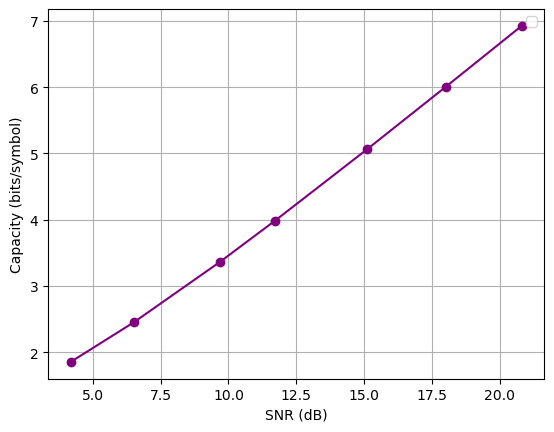

In [76]:


# Group the data by SNR and NoiseLevel and calculate the mean of cap
grouped_cap = data.groupby(['SNR', 'NoiseLevel'])['cap'].mean().reset_index()

# Create a plot for each noise level
plt.figure()
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    plt.plot(subset['SNR'], subset['cap'], label=noise_level, marker='o', color='purple')

plt.ylabel('Capacity (bits/symbol)')
plt.xlabel('SNR (dB)')
plt.grid(True, which ="both")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


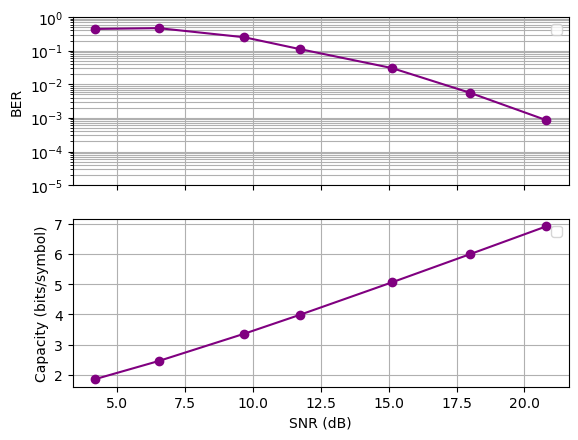

In [77]:
data = pd.read_csv('output.csv', header=None)


fig, axs = plt.subplots(2, 1, sharex=True)

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    axs[0].semilogy(subset['SNR'], subset['BER'], label=noise_level, color='purple', marker='o')
axs[0].set_ylabel('BER')
axs[0].set_ylim([10**(-5), 1])
axs[0].grid(True, which ="both")
axs[0].legend()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    axs[1].plot(subset['SNR'], subset['cap'], label=noise_level, marker='o', color='purple')
axs[1].set_ylabel('Capacity (bits/symbol)')
axs[1].set_xlabel('SNR (dB)')
axs[1].grid(True, which ="both")
axs[1].legend()

# Save the figure as an EPS file


plt.show()


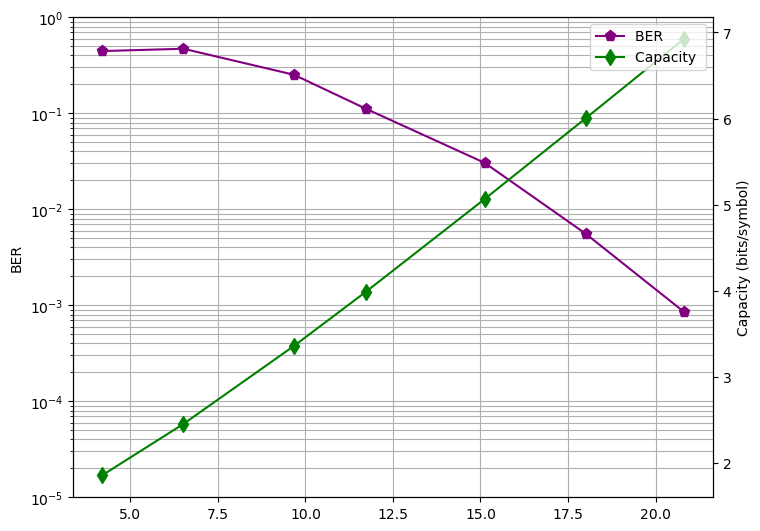

In [78]:
fig, ax1 = plt.subplots()

# Plot BER
for noise_level in grouped_ber['NoiseLevel'].unique():
    subset = grouped_ber[grouped_ber['NoiseLevel'] == noise_level]
    ax1.semilogy(subset['SNR'], subset['BER'], label='BER '+str(noise_level), color='purple', marker='p', markersize=8)
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Capacity
for noise_level in grouped_cap['NoiseLevel'].unique():
    subset = grouped_cap[grouped_cap['NoiseLevel'] == noise_level]
    ax2.plot(subset['SNR'], subset['cap'], label='Capacity '+str(noise_level), marker='d', color='green', markersize=8)

ax2.set_ylabel('Capacity (bits/symbol)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('SNR (dB)')

# Adjust plot area
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure as a PDF file with tight bounding box
# plt.savefig('figure.eps', format='eps', bbox_inches='tight')

plt.show()

/tmp/ipykernel_86151/984346700.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend2.legendHandles:  # Change the color of all markers to gray
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


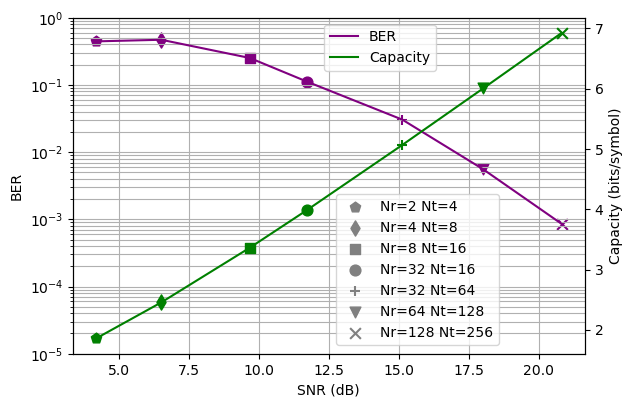

In [79]:
import itertools

data = pd.read_csv('output.csv', header=None)
data.columns = ['Test', 'Nr', 'Nt', 'NoiseLevel', 'ErrorPercentage', 'BER','SNR','EVM', 'cap']

# Filter data for NoiseLevel=3
data = data[data['NoiseLevel'] == 3]

fig, ax1 = plt.subplots()

# Define a list of markers
markers = itertools.cycle(('p', 'd', 's', 'o', '+', 'v', 'x', 'h', '<', '>'))

# Group data by 'Nr' and 'Nt'
grouped = data.groupby(['Nr', 'Nt'])

# Plot BER
line1, = ax1.semilogy(data['SNR'], data['BER'], label='BER', color='purple')
marker_handles = []  # List to store marker handles for the legend
for (nr, nt), group in grouped:
    marker = ax1.scatter(group['SNR'], group['BER'], label=f'Nr={nr} Nt={nt}', color='purple', marker=next(markers), s=60)  # Increase marker size
    marker_handles.append(marker)
ax1.set_ylabel('BER')
ax1.set_ylim([10**(-5), 1])
ax1.grid(True, which ="both")

# Create a second y-axis
ax2 = ax1.twinx()

# Reset markers
markers = itertools.cycle(('p', 'd', 's', 'o', '+', 'v', 'x', 'h', '<', '>'))

# Plot Capacity
line2, = ax2.plot(data['SNR'], data['cap'], label='Capacity', color='green')
for (nr, nt), group in grouped:
    marker = ax2.scatter(group['SNR'], group['cap'], label=f'Nr={nr} Nt={nt}', color='green', marker=next(markers), s=60)  # Increase marker size
ax2.set_ylabel('Capacity (bits/symbol)')

# Create custom legend
legend1 = plt.legend([line1, line2], ['BER', 'Capacity'], loc='upper center')  # Move the legend box a bit to the right
plt.gca().add_artist(legend1)
legend2 = plt.legend(marker_handles, [f'Nr={nr} Nt={nt}' for (nr, nt), group in grouped], loc='center left')
for handle in legend2.legendHandles:  # Change the color of all markers to gray
    handle.set_color('gray')
legend1.set_bbox_to_anchor([0.6, 1])  # Move the legend box a bit to the left
legend2.set_bbox_to_anchor([0.5, 0.25])  # Move the legend box a bit to the left

ax1.set_xlabel('SNR (dB)')

# Adjust plot area
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Save the figure as a PDF file with tight bounding box
plt.savefig('figure.eps', format='eps', bbox_inches='tight')

plt.show()

# BER against EVM

The Python script below generate a semilogarithmic plot (semilogy) that represents the relationship between the Error Vector Magnitude (EVM) and the Bit Error Rate (BER) for different noise levels in a communication system.

Error Vector Magnitude (EVM) is a measure of the performance of a digital communication system. It quantifies the difference between the ideal and actual signal in a communication system, providing an indication of the quality of the transmitted signal.

The formula for EVM is typically given as:

$$
EVM (\%) = \sqrt{\frac{\sum_{n=1}^{N} |e[n]|^2}{\sum_{n=1}^{N} |s[n]|^2}} \times 100
$$




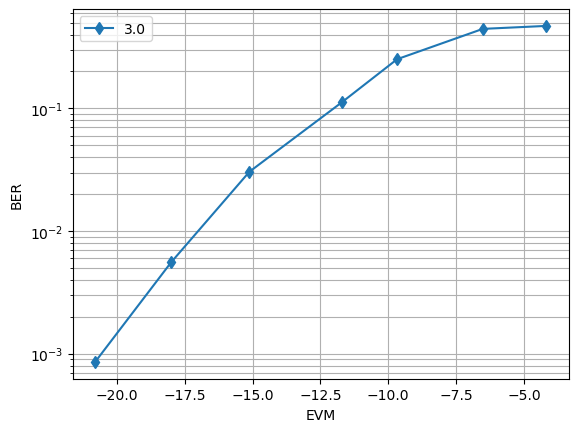

In [80]:

# Group the data by EVM and NoiseLevel and calculate the mean of BER
grouped_ber_evm = data.groupby(['EVM', 'NoiseLevel'])['BER'].mean().reset_index()

# Create a semilogy plot for each noise level
plt.figure()
for noise_level in grouped_ber_evm['NoiseLevel'].unique():
    subset = grouped_ber_evm[grouped_ber_evm['NoiseLevel'] == noise_level]
    plt.semilogy(subset['EVM'], subset['BER'], label=noise_level, marker='d')

plt.ylabel('BER')
plt.xlabel('EVM')
plt.grid(True, which ="both")
plt.legend()
plt.show()

# Boxplot of singular values of channels ($\lambda$)

This script is generating a boxplot to visualize the distribution of singular values of channels (λ) for different numbers of receiving and transmitting antennas in a Multiple-Input Multiple-Output (MIMO) communication system.

The singular values of a channel in a MIMO system provide important information about the channel's capacity. In particular, the singular values of the channel matrix are directly related to the capacity of the channel when using singular value decomposition (SVD) for MIMO communication.

Singular Value Decomposition (SVD) is a method of decomposing a matrix into three other matrices. Given a matrix A, the SVD is given by:

$$
A = U \Sigma V^T
$$

A boxplot, also known as a box-and-whisker plot, is a graphical tool for representing the distribution of numerical data through their quartiles. It can also indicate whether the data have outliers and what the symmetry of the distribution is.

Here's a description of the components of a boxplot:

- **Box**: The central box of the boxplot represents the middle 50% of the data, i.e., the interquartile range (IQR). The bottom line of the box indicates the first quartile (Q1, 25th percentile), the top line indicates the third quartile (Q3, 75th percentile), and the line inside the box indicates the median (Q2, 50th percentile).

- **Whiskers**: The whiskers extend from the box to show the range outside the interquartile range. Typically, they extend up to the maximum and minimum values within 1.5 * IQR. Any value outside of this is considered an outlier and is usually indicated by a dot.

- **Outliers**: These are represented by dots or circles outside the whiskers of the boxplot.




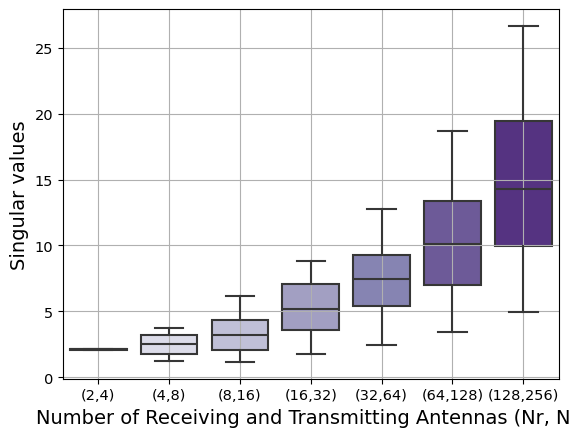

In [86]:
df = pd.read_csv('lambda.csv', header=None)
df = df.rename(columns={0: 'Nr', 1: 'Nt'})
for column in df.columns[2:]:
    df = df.rename(columns={column: str(column - 1)})
df = df.T
df = df.iloc[:, ::-1]

fig, ax = plt.subplots()

# Generate a boxplot:
sns.boxplot(data=df[2:], palette='Purples', order=list(df[2:].columns), ax=ax)
plt.grid()
ax.set_ylabel('Singular values', fontsize=14)
ax.set_xlabel('Number of Receiving and Transmitting Antennas (Nr, Nt)', fontsize=14)
labels = ['(2,4)', '(4,8)', '(8,16)', '(16,32)', '(32,64)', '(64,128)', '(128,256)']
plt.xticks(ticks=range(len(df[2:].columns)), labels=labels, fontsize=10.5)
ax.tick_params(axis='y', which='major', labelsize=10.5)
plt.savefig('boxplot.eps', format='eps', bbox_inches='tight')
plt.show()